In [2]:
! python -m pip install numpy matplotlib pandas scipy seaborn scikit-learn

  Using cached scipy-1.16.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.6/12.8 MB 8.8 MB/s eta 0:00:02
   ----------- ---------------------------- 3.7/12.8 MB 9.5 MB/s eta 0:00:01
   ------------------ --------------------- 6.0/12.8 MB 10.1 MB/s eta 0:00:01
   ---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import OneHotEncoder

1. Problemdefinition

I detta projekt ska jag utveckla och utvärdera ML-modeller som kan prediktera sjukvårdskostnader baserat på patientens bmi, ålder, kön, rökstatus och antal barn. Den bästa modellen ska produktionssättas i form av en streamlitsapplikation.


2. Få tillgång till datan

Läser in insurance.csv

In [3]:
df = pd.read_csv("data/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Hämtar information om datasetet.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.head(30)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Delar in datan till tränings och testdata. En EDA-analys kommer göras på träningsdatan.

In [ ]:
#Datan delas in i tränings och testdata.


train, test = train_test_split(df, test_size=0.2, random_state=40)

3. EDA och databearbetning

Information om träningsdatan.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 737 to 219
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   int64  
 1   sex       1070 non-null   object 
 2   bmi       1070 non-null   float64
 3   children  1070 non-null   int64  
 4   smoker    1070 non-null   object 
 5   region    1070 non-null   object 
 6   charges   1070 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.9+ KB


In [9]:
train.describe()

,age,bmi,children,charges
count,1070.000000,1070.000000,1070.000000,1070.000000
mean,39.447664,30.655925,1.099065,13319.694857
std,14.052906,6.034174,1.204722,12080.053549
min,18.000000,15.960000,0.000000,1135.940700
25%,27.000000,26.400000,0.000000,4832.368075
50%,40.000000,30.400000,1.000000,9401.175500
75%,51.000000,34.560000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Visualisering på fördelningen av kategoriska variabler.

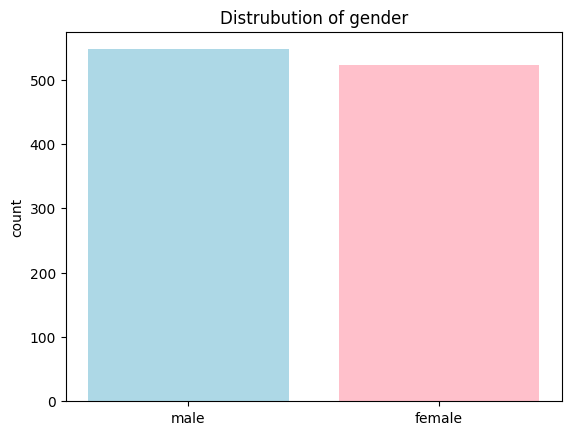

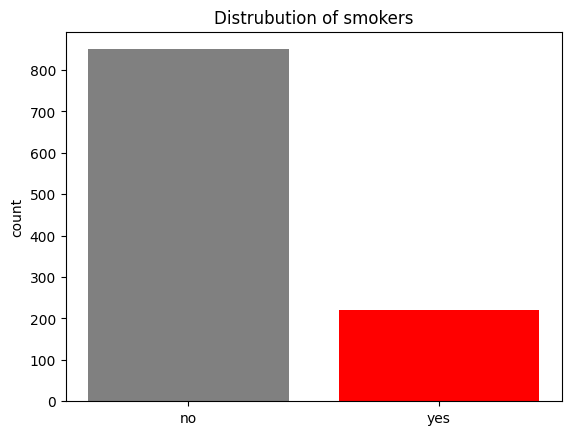

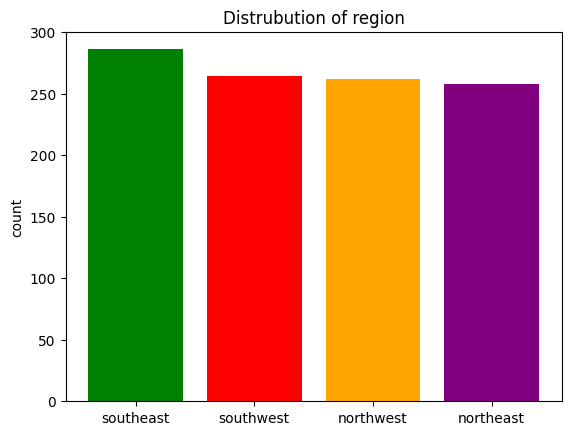

In [11]:
# Stapeldiagram på kön.
plt.bar(train['sex'].value_counts().index,train['sex'].value_counts().values, color=['lightblue', 'pink'])   
plt.title("Distrubution of gender")
plt.ylabel("count")
plt.show()

# Stapeldiagram på rökstsatus.
plt.bar(train['smoker'].value_counts().index,train['smoker'].value_counts().values, color=['grey', 'red'])   
plt.title("Distrubution of smokers")
plt.ylabel("count")
plt.show()

# Stapeldiagram på region.
plt.bar(train['region'].value_counts().index,train['region'].value_counts().values, color=['green', 'red', 'orange', 'purple'])   
plt.title("Distrubution of region")
plt.ylabel("count")
plt.show()


Visualiseringarna för region och kön visar en jämn fördelning. Gällande rökare, är det många fler antal icke rökare än antalet rökare.

Fördelning av numeriska värden

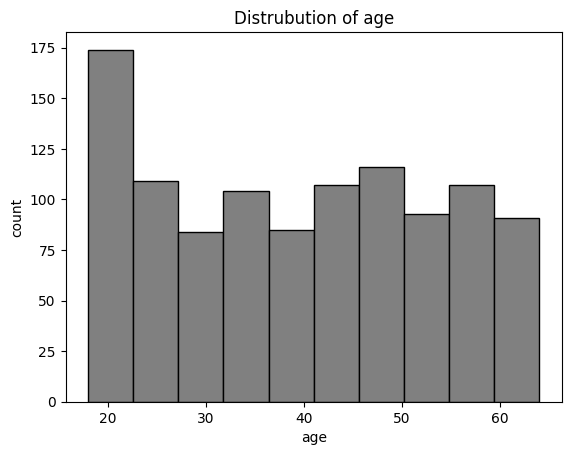

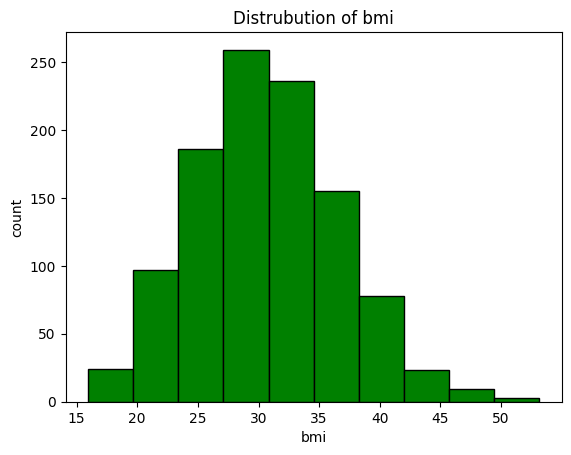

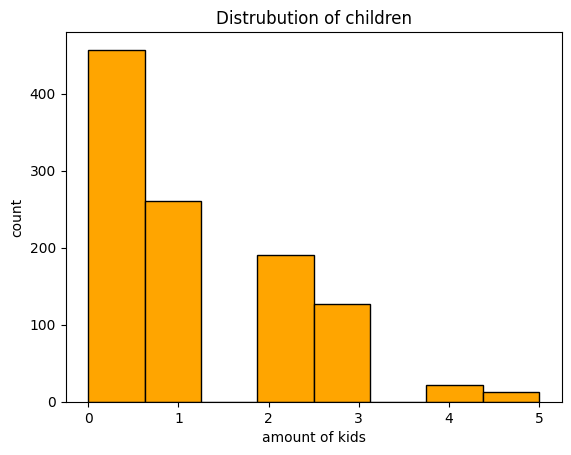

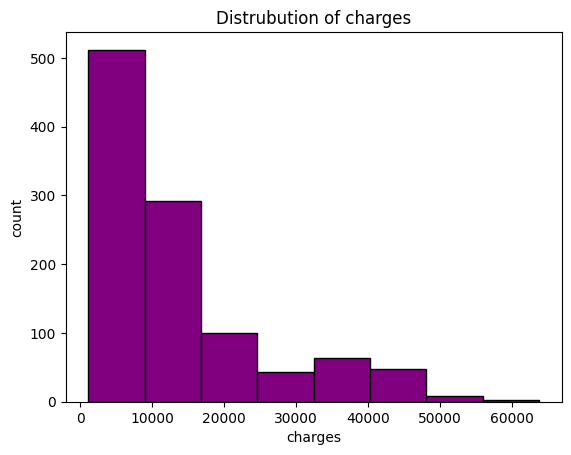

In [12]:
# Histogram på ålder.
plt.hist(train['age'], edgecolor='black', color='grey')
plt.title('Distrubution of age')
plt.xlabel("age")
plt.ylabel("count")
plt.show()

# Histogram på bmi.
plt.hist(train['bmi'], edgecolor='black', color='green')
plt.title('Distrubution of bmi')
plt.xlabel("bmi")
plt.ylabel("count")
plt.show()

# Histogram på antal barn.
plt.hist(train['children'],bins=8, edgecolor='black', color='orange')
plt.title('Distrubution of children')
plt.xlabel("amount of kids")
plt.ylabel("count")
plt.show()

# Histogram på sjukvårdskostnad.
plt.hist(train['charges'],bins=8, edgecolor='black', color='purple')
plt.title('Distrubution of charges')
plt.xlabel("charges")
plt.ylabel("count")
plt.show()

Bland histogrammen är det större antal unga än äldre.

Vissa BMI värden är extremt höga, som jag räknar som outliers.

Låddiagram skapas för upptäcka eventuella outliers.

Testade filtrera bort outliers för att se om resultatet blev bättre, vilket det inte blev. Datasetet är inte särskilt stort och valde därför att behålla alla outliers. Men noterar att det finns outliers.

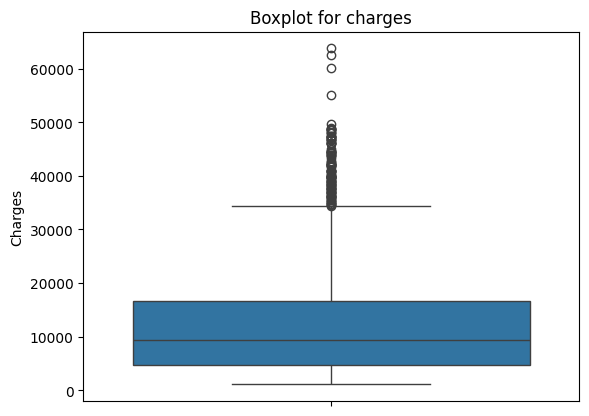

In [13]:
#Låddiagram på sjukvårdskonstnaderna.
sns.boxplot(data=train['charges'])
plt.title("Boxplot for charges")
plt.ylabel('Charges')
plt.show()

Här filtrerade jag bort outliers, men använder inte det.

In [ ]:
sns.boxplot(data=train['charges'])
plt.title("Boxplot for charges")
plt.ylabel('Charges')
plt.show()

outliers = train[(train['charges'] >= 52000)]
print(outliers)

train = train[(train['charges'] < 52000)]


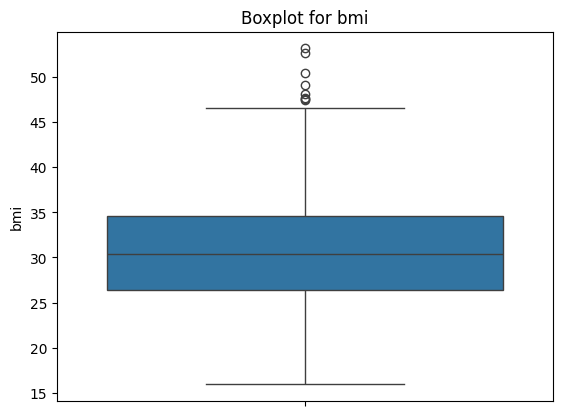

In [14]:
#Låddiagram på Bmi.
sns.boxplot(data=train['bmi'])
plt.title("Boxplot for bmi")
plt.ylabel('bmi')
plt.show()

Här filtrerade jag bort outliers, men använder inte det.

In [ ]:
sns.boxplot(data=train['bmi'])
plt.title("Boxplot for bmi")
plt.ylabel('bmi')
plt.show()

outliers = train[(train['bmi'] >= 50)]
print(outliers)
train = train[(train['bmi'] < 50)]

4. Bearbetning av data

Deklarerar X_train.

In [15]:
X_train = train.drop('charges', axis=1)
X_train

,age,sex,bmi,children,smoker,region
737,26,male,23.700,2,no,southwest
369,18,male,30.400,3,no,northeast
284,52,female,31.200,0,no,southwest
1302,25,female,20.800,1,no,southwest
958,43,male,34.960,1,yes,northeast
...,...,...,...,...,...,...
1330,57,female,25.740,2,no,southeast
1016,19,female,24.605,1,no,northwest
165,47,male,28.215,4,no,northeast
7,37,female,27.740,3,no,northwest


Delklarerar y_train

In [16]:
y_train = train['charges']
y_train

737      3484.33100
369      3481.86800
284      9625.92000
1302     3208.78700
958     41034.22140
           ...     
1330    12629.16560
1016     2709.24395
165     10407.08585
7        7281.50560
219     25081.76784
Name: charges, Length: 1070, dtype: float64

Deklarerar X_test

In [17]:
X_test = test.drop('charges', axis=1)
X_test

,age,sex,bmi,children,smoker,region
1099,25,female,33.990,1,no,southeast
759,18,male,38.170,0,yes,southeast
215,41,female,37.100,2,no,southwest
903,49,male,36.850,0,no,southeast
989,24,female,20.520,0,yes,northeast
...,...,...,...,...,...,...
408,38,male,21.120,3,no,southeast
466,60,female,28.700,1,no,southwest
724,50,female,27.075,1,no,northeast
693,24,male,23.655,0,no,northwest


Deklarerar y_test

In [19]:
y_test = test['charges']
4600/y_test.mean()

np.float64(0.3518514376134216)

Använder OneHotEncoder från Sklearn för att omvandla mina kategoriska variabler till numeriska i min träningsdata. Använder sedan transform på testdatan för att få numeriska värden även där.

In [20]:
encode = OneHotEncoder(sparse_output=False)

In [21]:
#Omvandlar de kategoriska variablerna till numeriska.
X_train_encoded = encode.fit_transform(X_train[['sex','smoker','region']])
X_test_encoded = encode.transform(X_test[['sex','smoker','region']])

In [22]:
X_train_encoded

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.]], shape=(1070, 8))

In [23]:
X_test_encoded

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(268, 8))

Lägger ihop de nya kolumnerna med de övriga. Både för tränings och testdatan.

In [24]:
X_train_final = np.hstack([X_train.drop(['sex','smoker','region'], axis=1).values, X_train_encoded])
X_test_final = np.hstack([X_test.drop(['sex','smoker','region'], axis=1).values, X_test_encoded])

In [25]:
X_train_final

array([[26.   , 23.7  ,  2.   , ...,  0.   ,  0.   ,  1.   ],
       [18.   , 30.4  ,  3.   , ...,  0.   ,  0.   ,  0.   ],
       [52.   , 31.2  ,  0.   , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [47.   , 28.215,  4.   , ...,  0.   ,  0.   ,  0.   ],
       [37.   , 27.74 ,  3.   , ...,  1.   ,  0.   ,  0.   ],
       [24.   , 23.21 ,  0.   , ...,  0.   ,  1.   ,  0.   ]],
      shape=(1070, 11))

In [26]:
X_test_final

array([[25.   , 33.99 ,  1.   , ...,  0.   ,  1.   ,  0.   ],
       [18.   , 38.17 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       [41.   , 37.1  ,  2.   , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [50.   , 27.075,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [24.   , 23.655,  0.   , ...,  1.   ,  0.   ,  0.   ],
       [23.   , 31.73 ,  3.   , ...,  0.   ,  0.   ,  0.   ]],
      shape=(268, 11))

5. Machine Learning

5.1 Linjär Regression: Träning och utvärdering

In [27]:
lin_model = LinearRegression()

Utvärderar min modell med cross_validation. Både R2 och RMSE.

In [28]:
#Krossvalidering på modellen för att få fram R2 och RMSE.
cv_lin = cross_validate(lin_model, X_train_final, y_train, cv=5, scoring = ['r2','neg_root_mean_squared_error']) 


r2_mean = cv_lin['test_r2'].mean()  
rmse_mean = cv_lin['test_neg_root_mean_squared_error'].mean() 

print('R2: ', cv_lin['test_r2'])
print('R2_mean: ',r2_mean)
print('RMSE: ' , cv_lin['test_neg_root_mean_squared_error'])
print('RMSE_mean: ',rmse_mean)



R2:  [0.67038058 0.8181439  0.75973172 0.7519922  0.71313989]
R2_mean:  0.7426776556657462
RMSE:  [-6194.10553777 -5339.24247286 -5731.66198793 -5859.06920298
 -7092.59383385]
RMSE_mean:  -6043.334607080393


5.2 Random Forest: Träning och utvärdering

In [29]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [30]:
cv_rf = cross_validate(rf_model, X_train_final, y_train, cv=5, scoring = ['r2','neg_root_mean_squared_error']) 

r2_mean = cv_rf['test_r2'].mean()  
rmse_mean = cv_rf['test_neg_root_mean_squared_error'].mean() 

print('R2: ', cv_rf['test_r2'])
print('R2_mean: ',r2_mean)
print('RMSE: ' , cv_rf['test_neg_root_mean_squared_error'])
print('RMSE_mean: ',rmse_mean)

R2:  [0.77161571 0.88133137 0.8688662  0.833978   0.81307268]
R2_mean:  0.8337727919914784
RMSE:  [-5155.9098849  -4313.04180085 -4234.37843921 -4793.78740956
 -5725.407532  ]
RMSE_mean:  -4844.505013304474


5.3 Decision Tree: Träning och utvärdering

In [31]:
tree_model = DecisionTreeRegressor(random_state=42)

In [32]:
cv_tree = cross_validate(tree_model, X_train_final, y_train, cv=5, scoring = ['r2','neg_root_mean_squared_error']) 

r2_mean = cv_tree['test_r2'].mean()  
rmse_mean = cv_tree['test_neg_root_mean_squared_error'].mean() 

print('R2: ', cv_tree['test_r2'])
print('R2_mean: ',r2_mean)
print('RMSE: ' , cv_tree['test_neg_root_mean_squared_error'])
print('RMSE_mean: ',rmse_mean)


R2:  [0.61564045 0.81213443 0.76203894 0.72439139 0.63754973]
R2_mean:  0.7103509879793418
RMSE:  [-6688.68962511 -5426.74351291 -5704.07590413 -6176.49861013
 -7972.49439356]
RMSE_mean:  -6393.700409167886


Bästa modellen: Random Forest

Grid Search på bästa modellen för förbättra modellen genom att hitta de bästa parametrarna.

In [33]:
#Grid Search för att få fram de bästa parametrarna.
param_grid = {'max_depth': [5, 10, 15, 50], 
              'n_estimators':[100, 200],} 
grid_search = GridSearchCV(rf_model, param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_final, y_train) 

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'n_estimators': [100, 200]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [34]:
best_model = grid_search.best_estimator_

Uvärdera modellen på testdatan

In [35]:
print("R² Train:", best_model.score(X_train_final, y_train))
print("R² Test:", best_model.score(X_test_final, y_test))

R² Train: 0.8924121611940934
R² Test: 0.8557097039435794


In [36]:
print("RMSE_Train: ",root_mean_squared_error(y_train, best_model.predict(X_train_final))) 
print("RMSE_Test: ",root_mean_squared_error(y_test, best_model.predict(X_test_final)))

RMSE_Train:  3960.476266006272
RMSE_Test:  4644.4178673905535


Predikterar y-värden baserat på test data.

In [37]:
y_pred = best_model.predict(X_test_final)

Skapar en visaulisering för att se sambandet mellan predikterade och verkliga värden.

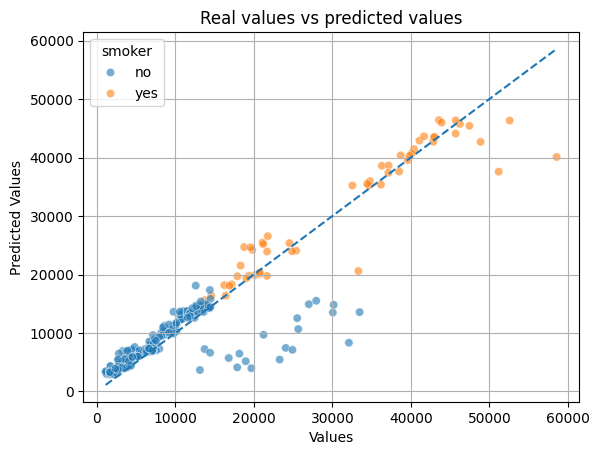

In [38]:
# En visualisering för att se sambandet mellan de verkliga och predikterade värdena.
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, hue=X_test.smoker)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],linestyle='--')
plt.title('Real values vs predicted values')
plt.xlabel('Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

De flesta punkter följer linjen, det finns en del som ligger lite utanför. Densamma gäller för residualer.

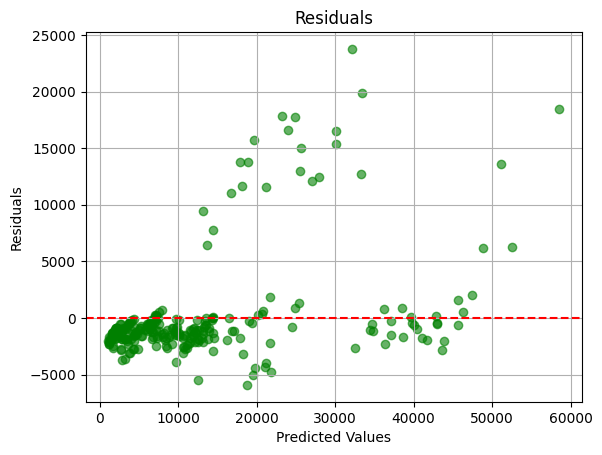

In [39]:
#En visaulisering på residualer.
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

Slutgiltlig modell

Slår ihop train och testdatan till fulla datasetet och tränar modellen på det.

In [40]:
X = np.vstack([X_train_final, X_test_final])
y = np.hstack([y_train.values, y_test.values])

In [41]:
X

array([[26.   , 23.7  ,  2.   , ...,  0.   ,  0.   ,  1.   ],
       [18.   , 30.4  ,  3.   , ...,  0.   ,  0.   ,  0.   ],
       [52.   , 31.2  ,  0.   , ...,  0.   ,  0.   ,  1.   ],
       ...,
       [50.   , 27.075,  1.   , ...,  0.   ,  0.   ,  0.   ],
       [24.   , 23.655,  0.   , ...,  1.   ,  0.   ,  0.   ],
       [23.   , 31.73 ,  3.   , ...,  0.   ,  0.   ,  0.   ]],
      shape=(1338, 11))

In [42]:
y

array([ 3484.331  ,  3481.868  ,  9625.92   , ..., 10106.13425,
        2352.96845, 36189.1017 ], shape=(1338,))

In [43]:
#Tränar om modellen på allt tillgänglig data.
best_model.fit(X,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Produktionsättning: Streamlit applikation

In [44]:
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [45]:
joblib.dump(encode, 'encode.pkl')

['encode.pkl']